In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk(r'C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\sample_submission.csv
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\sample_submission.csv.zip
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\test.csv
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\test.csv.zip
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\test_labels.csv
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\test_labels.csv.zip
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\train.csv
C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\train.csv.zip


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BUCKWILD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB ##binary ise bernaulli ve gauss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

#Bulut resmi için
import os
from PIL import Image

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
#WordCloud
from wordcloud import WordCloud,STOPWORDS

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
train = pd.read_csv(r'C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\train.csv',encoding = 'ISO-8859-1')
test_labels = pd.read_csv(r'C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\test_labels.csv',encoding = 'ISO-8859-1')
test = pd.read_csv(r'C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\test.csv',encoding = 'ISO-8859-1')
sub = pd.read_csv(r'C:\Users\BUCKWILD\Desktop\Toxic-comment-classification\data\sample_submission.csv',encoding = 'ISO-8859-1' )

In [17]:
train.shape

(159571, 8)

In [18]:
sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [19]:
train = train.iloc[0:30000,:]
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [21]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [22]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [23]:
test_comb = pd.merge(test,test_labels,on='id')
test_comb.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [24]:
# Dropping test label rows where equals -1
test_comb = test_comb[
    (test_comb.toxic != -1) | (test_comb.severe_toxic != -1) |
    (test_comb.obscene != -1) | (test_comb.threat != -1) |
    (test_comb.insult != -1) | (test_comb.identity_hate != -1)
]
test_comb = test_comb.reset_index(drop=True)

In [26]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [27]:
test_comb.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

# **Data Cleaning**

In [28]:
train['comment_text'].replace({'r"\&\#[0-9]+\;"':''},regex=True,inplace=True)#html karakter
train['comment_text'] = train['comment_text'].str.lower()
train['comment_text'].str.replace('[^\w\s]','')#noktalama
train['comment_text'].str.replace('#','')
train['comment_text'].str.replace('\d+','') #rakamları kaldırır
train['comment_text'].str.replace('\n',' ').replace('\r','')
train['comment_text'].replace({'r"[\s]+"':''},regex=True,inplace=True)#gereksiz bosluk

## **Tokenization** 

In [29]:
from nltk import word_tokenize
train['comment_text'] = train['comment_text'].apply(lambda x: word_tokenize(x.lower()))

## **StopWords Removal**

In [30]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BUCKWILD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
train['comment_text'] = train['comment_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [32]:
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(x))

# **Lemmatization**

In [33]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\BUCKWILD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BUCKWILD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from nltk.stem import WordNetLemmatizer
train['comment_text'] = train['comment_text'].apply(lambda x: WordNetLemmatizer().lemmatize(x))

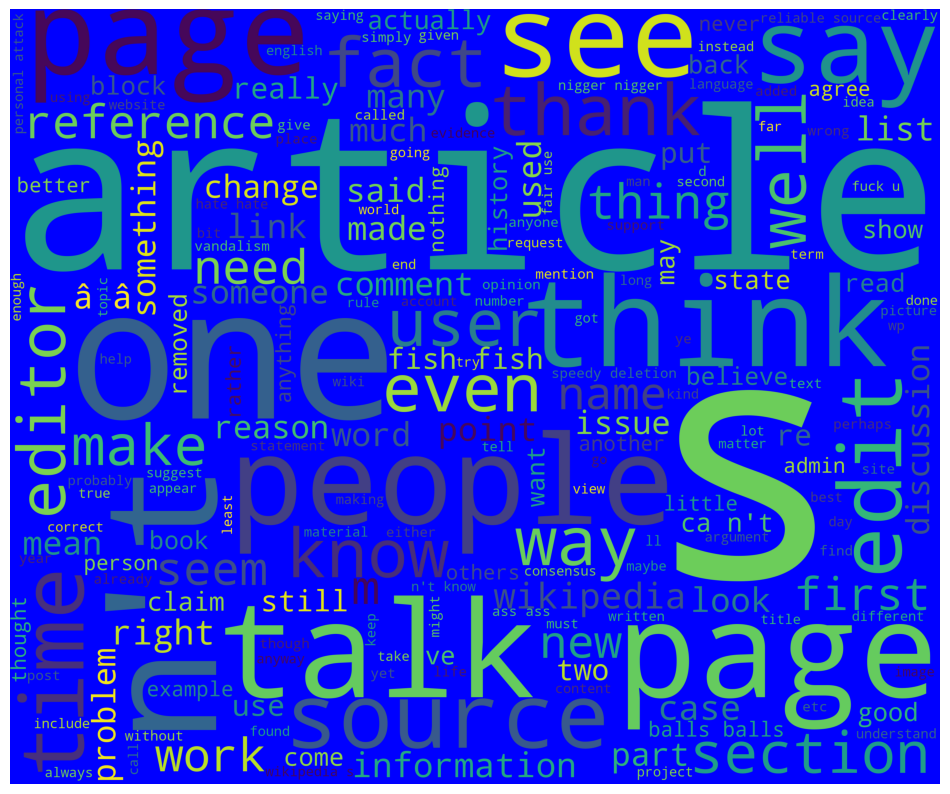

In [36]:
all_comments = []
for item in train['comment_text']:
    all_comments.append(item)
commonWord = ' '.join(all_comments)

from wordcloud import WordCloud,STOPWORDS
common_word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='blue',
                      width=3000,
                      height=2500
                     ).generate(commonWord)

plt.figure(1,figsize=(12, 12))
plt.imshow(common_word_cloud)
plt.axis('off')
plt.show()

## **Modeling**

In [37]:
train['easy_label'] = np.where(((train["toxic"] == 1) | (train["severe_toxic"] == 1) | (train["obscene"] == 1) | (train["threat"] == 1) | (train["insult"] == 1) | (train["identity_hate"] == 1)), 1, 0)

In [38]:
nb_data = train[["comment_text", "easy_label"]]

In [39]:
nb_x = nb_data['comment_text']
nb_y = nb_data['easy_label']
nb_x, nb_x_test, nb_y, nb_y_test = train_test_split(nb_x,nb_y, stratify=nb_y, test_size=0.25, random_state=42)

In [40]:
nb_x.shape

(22500,)

In [41]:
vec = CountVectorizer(stop_words='english')
nb_x = vec.fit_transform(nb_x).toarray()
nb_x_test = vec.transform(nb_x_test).toarray()

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
pred_vec=nb.fit(nb_x,nb_y).predict(nb_x_test)
accuracy=accuracy_score(nb_y_test,pred_vec)
accuracy

0.946

In [43]:
precision=precision_score(nb_y_test,pred_vec,average='weighted')
precision

0.9433290391423154

In [44]:
f1=f1_score(nb_y_test,pred_vec,average='weighted')
f1

0.940496544021717

In [45]:
recall=recall_score(nb_y_test,pred_vec,average='weighted')
recall

0.946

In [46]:
confusion_matrix(nb_y_test,pred_vec)

array([[6659,   59],
       [ 346,  436]], dtype=int64)

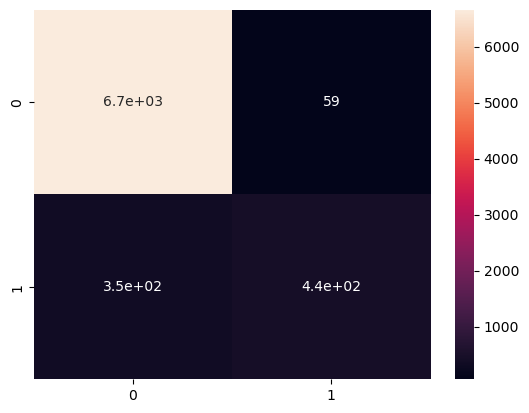

In [47]:
sns.heatmap(confusion_matrix(nb_y_test,pred_vec),annot=True);